# Computing

In [1]:
library(AppliedPredictiveModeling)
data(solubility)
ls(pattern="^solT")

Warning message:
"package 'AppliedPredictiveModeling' was built under R version 3.5.1"

[1] "solTestX"       "solTestXtrans"  "solTestY"       "solTrainX"     
[5] "solTrainXtrans" "solTrainY"

In [3]:
dim(solTrainX)
dim(solTestX)

[1] 951 228

[1] 316 228

In [4]:
set.seed(2)
sample(names(solTrainX),8)
colnames(solTrainX)

[1] "FP043"        "FP160"        "FP130"        "FP038"        "NumBonds"    
[6] "NumNonHAtoms" "FP029"        "FP185"

[1] "FP001"             "FP002"             "FP003"            
  [4] "FP004"             "FP005"             "FP006"            
  [7] "FP007"             "FP008"             "FP009"            
 [10] "FP010"             "FP011"             "FP012"            
 [13] "FP013"             "FP014"             "FP015"            
 [16] "FP016"             "FP017"             "FP018"            
 [19] "FP019"             "FP020"             "FP021"            
 [22] "FP022"             "FP023"             "FP024"            
 [25] "FP025"             "FP026"             "FP027"            
 [28] "FP028"             "FP029"             "FP030"            
 [31] "FP031"             "FP032"             "FP033"            
 [34] "FP034"             "FP035"             "FP036"            
 [37] "FP037"             "FP038"             "FP039"            
 [40] "FP040"             "FP041"             "FP042"            
 [43] "FP043"             "FP044"             "FP045"            
 [46] "FP046"             "FP047"             "FP048"            
 [49] "FP049"             "FP050"             "FP051"            
 [52] "FP052"             "FP053"             "FP054"            
 [55] "FP055"             "FP056"             "FP057"            
 [58] "FP058"             "FP059"             "FP060"            
 [61] "FP061"             "FP062"             "FP063"            
 [64] "FP064"             "FP065"             "FP066"            
 [67] "FP067"             "FP068"             "FP069"            
 [70] "FP070"             "FP071"             "FP072"            
 [73] "FP073"             "FP074"             "FP075"            
 [76] "FP076"             "FP077"             "FP078"            
 [79] "FP079"             "FP080"             "FP081"            
 [82] "FP082"             "FP083"             "FP084"            
 [85] "FP085"             "FP086"             "FP087"            
 [88] "FP088"             "FP089"             "FP090"            
 [91] "FP091"             "FP092"             "FP093"            
 [94] "FP094"             "FP095"             "FP096"            
 [97] "FP097"             "FP098"             "FP099"            
[100] "FP100"             "FP101"             "FP102"            
[103] "FP103"             "FP104"             "FP105"            
[106] "FP106"             "FP107"             "FP108"            
[109] "FP109"             "FP110"             "FP111"            
[112] "FP112"             "FP113"             "FP114"            
[115] "FP115"             "FP116"             "FP117"            
[118] "FP118"             "FP119"             "FP120"            
[121] "FP121"             "FP122"             "FP123"            
[124] "FP124"             "FP125"             "FP126"            
[127] "FP127"             "FP128"             "FP129"            
[130] "FP130"             "FP131"             "FP132"            
[133] "FP133"             "FP134"             "FP135"            
[136] "FP136"             "FP137"             "FP138"            
[139] "FP139"             "FP140"             "FP141"            
[142] "FP142"             "FP143"             "FP144"            
[145] "FP145"             "FP146"             "FP147"            
[148] "FP148"             "FP149"             "FP150"            
[151] "FP151"             "FP152"             "FP153"            
[154] "FP154"             "FP155"             "FP156"            
[157] "FP157"             "FP158"             "FP159"            
[160] "FP160"             "FP161"             "FP162"            
[163] "FP163"             "FP164"             "FP165"            
[166] "FP166"             "FP167"             "FP168"            
[169] "FP169"             "FP170"             "FP171"            
[172] "FP172"             "FP173"             "FP174"            
[175] "FP175"             "FP176"             "FP177"            
[178] "FP178"             "FP179"             "FP180"            
[181] "FP181"             "FP182"         

In [5]:
#find out missing values
any(is.na(solTrainX))


[1] FALSE

In [6]:
#skewness & distribution
#for predictors
library(e1071)
skew_info <- apply(solTrainX[209:228],2,skewness)
sort(skew_info,decreasing = T)
# for response 
sort(skewness(solTrainY),decreasing = T)

NumSulfer HydrophilicFactor       NumChlorine        NumHalogen 
        3.8354736         3.3984174         3.1729273         2.6872423 
        NumOxygen      SurfaceArea1       NumRotBonds       NumNitrogen 
        1.7688961         1.7114409         1.5749735         1.5516424 
     SurfaceArea2          NumAtoms          NumBonds       NumDblBonds 
        1.4727158         1.3623110         1.3579007         1.3574802 
      NumHydrogen          NumRings      NumNonHAtoms         MolWeight 
        1.2595533         1.0324447         0.9915112         0.9868244 
     NumNonHBonds         NumCarbon  NumAromaticBonds      NumMultBonds 
        0.9677742         0.9258765         0.7943773         0.6691816

[1] -0.6693161

In [7]:
#does make better when doing Box-Cox trans
skew_info_cox <- apply(solTrainXtrans[209:228],2,skewness)
sort(skew_info_cox,decreasing = T)

NumSulfer       NumChlorine        NumHalogen       NumNitrogen 
     2.2707457390      1.4673236666      1.0331764976      0.4262727429 
        NumOxygen       NumDblBonds HydrophilicFactor       NumRotBonds 
     0.1870352249      0.1496862360      0.1003040295      0.0973568321 
        NumCarbon      NumNonHBonds          NumRings         MolWeight 
     0.0616443828      0.0432437801      0.0055727736     -0.0002162255 
      NumHydrogen      NumNonHAtoms          NumAtoms      NumMultBonds 
    -0.0407015938     -0.0555982369     -0.0713055864     -0.0946655258 
     SurfaceArea1  NumAromaticBonds      SurfaceArea2          NumBonds 
    -0.1316118434     -0.1463815894     -0.1681548297     -0.1881635919

In [8]:
#would YeoJohnson trans make better?
library(caret)
trans_yeo <- preProcess(solTrainX[,209:228],method="YeoJohnson")
solTrainXtrans_yeo <- predict(trans_yeo,newdata = solTrainX[,209:228])
sort(apply(solTrainXtrans_yeo,2,skewness),decreasing = T)

Warning message:
"package 'caret' was built under R version 3.5.1"Loading required package: lattice
Loading required package: ggplot2


NumSulfer       NumChlorine        NumHalogen       NumNitrogen 
     3.8354735644      3.1729272633      1.0067642743      0.4286810332 
HydrophilicFactor       NumDblBonds         NumOxygen       NumHydrogen 
     0.2492718016      0.1584856832      0.0414896755      0.0290729312 
      NumRotBonds          NumBonds          NumAtoms          NumRings 
     0.0208437271      0.0054580497      0.0014240713      0.0009134123 
        MolWeight      NumNonHAtoms         NumCarbon      NumNonHBonds 
    -0.0002162255     -0.0038745321     -0.0042561518     -0.0132954797 
 NumAromaticBonds      NumMultBonds      SurfaceArea1      SurfaceArea2 
    -0.0845954241     -0.1418027368     -0.2343397620     -0.2451259489

Warning message:
"package 'corrplot' was built under R version 3.5.1"corrplot 0.84 loaded


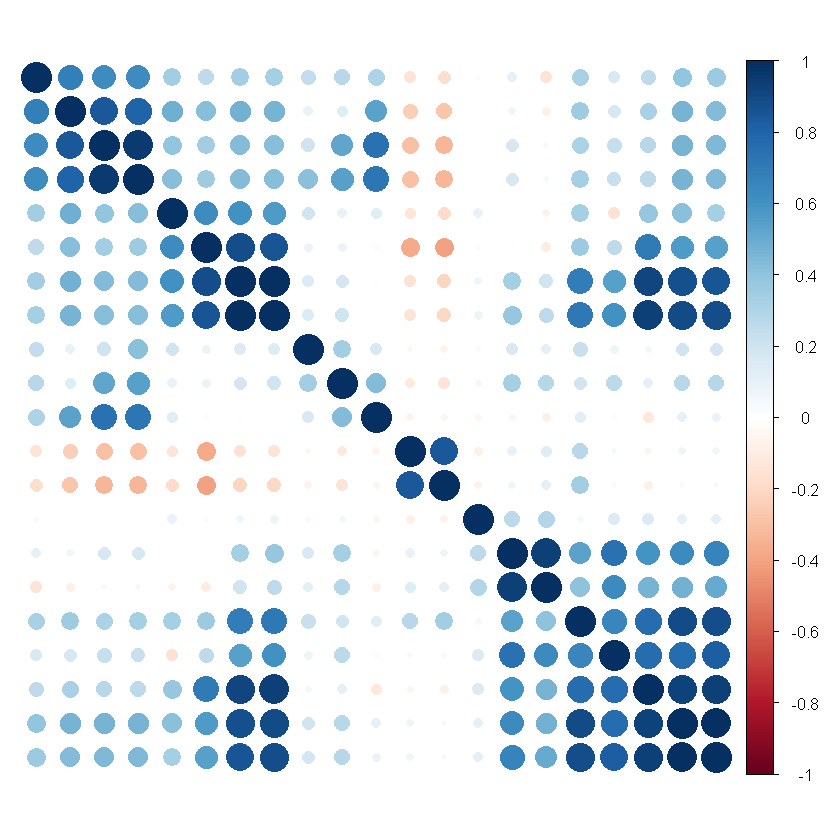

In [9]:
#how is the corr
library(corrplot)
corrplot(cor(solTrainXtrans[,208:228]), order = "hclust", addgrid.col = NA, tl.pos = "n")

## Ordinary Linear Regression

In [14]:
trn <- solTrainXtrans
trn$Solubility <- solTrainY

#fit_lm <- train(Solubility~.,data=trn,method = "lm")
fit_lm <- lm(Solubility~.,data=trn)
summary(fit_lm)


Call:
lm(formula = Solubility ~ ., data = trn)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.75620 -0.28304  0.01165  0.30030  1.54887 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        2.431e+00  2.162e+00   1.124 0.261303    
FP001              3.594e-01  3.185e-01   1.128 0.259635    
FP002              1.456e-01  2.637e-01   0.552 0.580960    
FP003             -3.969e-02  1.314e-01  -0.302 0.762617    
FP004             -3.049e-01  1.371e-01  -2.223 0.026520 *  
FP005              2.837e+00  9.598e-01   2.956 0.003223 ** 
FP006             -6.886e-02  2.041e-01  -0.337 0.735917    
FP007              4.044e-02  1.152e-01   0.351 0.725643    
FP008              1.121e-01  1.636e-01   0.685 0.493331    
FP009             -8.242e-01  8.395e-01  -0.982 0.326536    
FP010              4.193e-01  3.136e-01   1.337 0.181579    
FP011              5.158e-02  2.198e-01   0.235 0.814503    
FP012             -1.346e-02  1.611e-01 

In [11]:
fit_lm$results
RMSE(pred = fit_lm$finalModel$fitted.values,obs = solTrainY)
R2(pred = fit_lm$finalModel$fitted.values,obs = solTrainY)

intercept,RMSE,Rsquared,MAE,RMSESD,RsquaredSD,MAESD
TRUE,0.8300389,0.8427544,0.6051472,0.05474902,0.02016244,0.04024677


[1] 0.4813314

[1] 0.9446316

In [13]:
pred_lm <- predict(fit_lm,newdata = solTestXtrans)
# RMSE(pred = pred_lm,obs = solTestY)
# R2(pred = pred_lm,obs = solTestY)
values_lm <- data.frame(obs=solTestY,pred=pred_lm)
defaultSummary(values_lm)

RMSE  Rsquared       MAE 
0.7455802 0.8722236 0.5497605

In [17]:
#robust linear regression
library(MASS)
fit_rlm <- rlm(Solubility~.,data=trn)
summary(fit_rlm)

pred_rlm <- predict(fit_rlm,newdata = solTestXtrans)
values_rlm <- data.frame(obs=solTestY,pred=pred_rlm)
defaultSummary(values_rlm)


Call: rlm(formula = Solubility ~ ., data = trn)
Residuals:
     Min       1Q   Median       3Q      Max 
-2.89940 -0.25046  0.01221  0.25351  1.86225 

Coefficients:
                  Value    Std. Error t value 
(Intercept)         2.5861   1.9646     1.3164
FP001               0.3706   0.2894     1.2804
FP002               0.0370   0.2396     0.1546
FP003              -0.0527   0.1194    -0.4419
FP004              -0.2927   0.1246    -2.3491
FP005               2.2348   0.8721     2.5626
FP006              -0.1329   0.1854    -0.7167
FP007               0.0144   0.1047     0.1376
FP008               0.1517   0.1486     1.0209
FP009              -0.8072   0.7628    -1.0582
FP010               0.2696   0.2849     0.9464
FP011               0.2455   0.1997     1.2294
FP012              -0.0579   0.1464    -0.3957
FP013              -0.2125   0.4973    -0.4272
FP014               0.2084   0.4134     0.5041
FP015              -0.2071   0.1382    -1.4984
FP016              -0.2203   0.140

RMSE  Rsquared       MAE 
0.7529670 0.8700394 0.5371296

In [30]:
ctrl <- trainControl(method = "cv",number=10)
set.seed(100)
fit_lm_cv <- train(x=solTrainXtrans,y=solTrainY,method = "lm",trControl = ctrl)
fit_lm_cv
#prediction from a rank-deficient fit may be misleading

Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"

Linear Regression 

951 samples
228 predictors

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 856, 856, 855, 855, 857, 856, ... 
Resampling results:

  RMSE       Rsquared   MAE      
  0.6926348  0.8872058  0.5199216

Tuning parameter 'intercept' was held constant at a value of TRUE

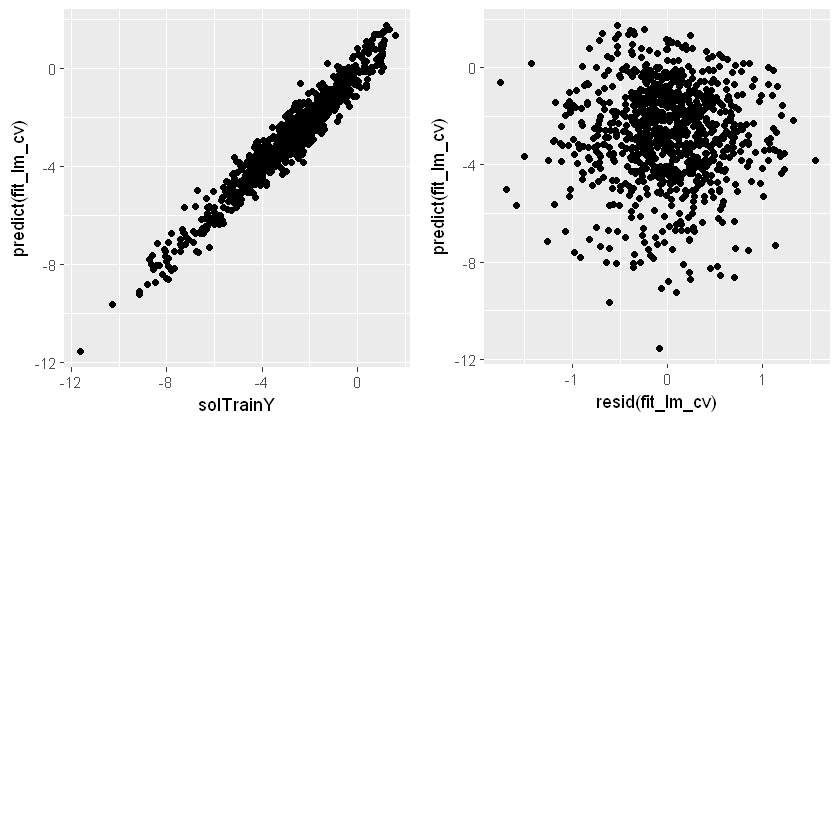

In [47]:
library(ggplot2)
library(ggthemes)
p1 <- ggplot(aes(solTrainY,predict(fit_lm_cv)),data=solTrainX) + geom_point()
p2 <- ggplot(aes(resid(fit_lm_cv),predict(fit_lm_cv)),data=solTrainX) + geom_point()
library(gridExtra)
grid.arrange(p1, p2, ncol=2,nrow=2)   

In [56]:
#get rid of predictors with high correlations
high_cor <- findCorrelation(cor(solTrainXtrans),.90)
cor_info <- names(solTrainXtrans)[high_cor]
trn_flt_cor <- solTrainXtrans[,-high_cor]
vls_flt_cor <- solTestXtrans[,-high_cor]

In [57]:
set.seed(100)
fit_lm_flt <- train(x=trn_flt_cor,y=solTrainY,method = "lm",trControl = ctrl)
fit_lm_flt

Linear Regression 

951 samples
190 predictors

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 856, 856, 855, 855, 857, 856, ... 
Resampling results:

  RMSE       Rsquared   MAE      
  0.6980579  0.8857871  0.5251033

Tuning parameter 'intercept' was held constant at a value of TRUE

In [62]:
set.seed(100)
fit_rlmPCA <- train(Solubility~.,data=trn,method = "rlm",
                    preProcess="pca",trControl = ctrl) 
fit_rlmPCA

Warning message in rlm.default(x, y, weights, method = method, wt.method = wt.method, :
"'rlm' failed to converge in 20 steps"Warning message in rlm.default(x, y, weights, method = method, wt.method = wt.method, :
"'rlm' failed to converge in 20 steps"

Robust Linear Model 

951 samples
228 predictors

Pre-processing: principal component signal extraction (228), centered
 (228), scaled (228) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 856, 856, 855, 855, 857, 856, ... 
Resampling results across tuning parameters:

  intercept  psi           RMSE       Rsquared   MAE      
  FALSE      psi.huber     2.8245812  0.8561008  2.7155082
  FALSE      psi.hampel    2.8245118  0.8561763  2.7154817
  FALSE      psi.bisquare  2.8244621  0.8562213  2.7154216
   TRUE      psi.huber     0.7828457  0.8550937  0.5970333
   TRUE      psi.hampel    0.7825426  0.8552118  0.5972415
   TRUE      psi.bisquare  0.7903976  0.8524410  0.6016888

RMSE was used to select the optimal model using the smallest value.
The final values used for the model were intercept = TRUE and psi = psi.hampel.

## Partial Least Squares &#x1F4C8; 


In [65]:
library(pls)
fit_pls <- plsr(Solubility~.,data=trn)

Data: 	X dimension: 951 228 
	Y dimension: 951 1
Fit method: kernelpls
Number of components considered: 228
TRAINING: % variance explained
            1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps
X             49.80    65.87    71.13    73.66    74.86    76.08    77.37
Solubility    26.52    61.86    75.13    84.28    87.79    89.44    90.20
            8 comps  9 comps  10 comps  11 comps  12 comps  13 comps  14 comps
X             78.58    80.33     81.56     82.32     82.96     83.64     84.14
Solubility    90.81    91.17     91.52     91.97     92.34     92.56     92.77
            15 comps  16 comps  17 comps  18 comps  19 comps  20 comps
X              85.13     85.77     86.37     86.81     87.47     87.78
Solubility     92.90     93.06     93.14     93.26     93.33     93.43
            21 comps  22 comps  23 comps  24 comps  25 comps  26 comps
X              88.28     88.63     88.89     89.14     89.51     89.84
Solubility     93.48     93.53     93.59     93

In [ ]:
set.seed(100)
fit_pls_cv <- train(solTrainXtrans,solTrainY,methon="pls",
                   tuneLength=20,trControl=trainControl(method = "cv",number=10),preProc=c("center","scale"))

Warning message:
"package 'caret' was built under R version 3.5.1"Loading required package: lattice
Loading required package: ggplot2
